In [1]:
install.packages("rpart")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
library("rpart")

In [3]:
print(summary(iris))
print(head(iris))

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                
  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa


In [5]:
set.seed(42)
trainingRowIndex = sample(1:nrow(iris), 0.7*nrow(iris))
print("Selected training row index")
print(trainingRowIndex)
trainingData = iris[trainingRowIndex,]
testData = iris[-trainingRowIndex,]
print(nrow(trainingData))
print(nrow(testData))

[1] "Selected training row index"
  [1] 138 140  43 123  94  76 107  20 146 100  65 141 129  35  63 127 132  16
 [19] 136  74 118  18 135 121  11 149  49 112  55 102  89  97  46  81   1  96
 [37] 116  24 128  68  42  48   5 105 130 101  93  66 139 134  34 137  40  77
 [55]   4  72  64 133  25  47  61  88  67  50 131  17  23  69  57 143 115  12
 [73]  85  37 104  54 114  28  38  86  41 126  92  44  52 119  15   6 144  19
 [91]  70  71  13  75 103  60 150  73  39  32  51  83 124  90 120
[1] 105
[1] 45


In [6]:
iris.tree = rpart(Species ~ Sepal.Length + Sepal.Width + Petal.Length +Petal.Width,
                 data = trainingData, method="class")
print(iris.tree)

n= 105 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 105 68 virginica (0.31428571 0.33333333 0.35238095)  
  2) Petal.Length< 2.6 33  0 setosa (1.00000000 0.00000000 0.00000000) *
  3) Petal.Length>=2.6 72 35 virginica (0.00000000 0.48611111 0.51388889)  
    6) Petal.Length< 4.85 37  3 versicolor (0.00000000 0.91891892 0.08108108) *
    7) Petal.Length>=4.85 35  1 virginica (0.00000000 0.02857143 0.97142857) *


In [7]:
library(rpart.plot)

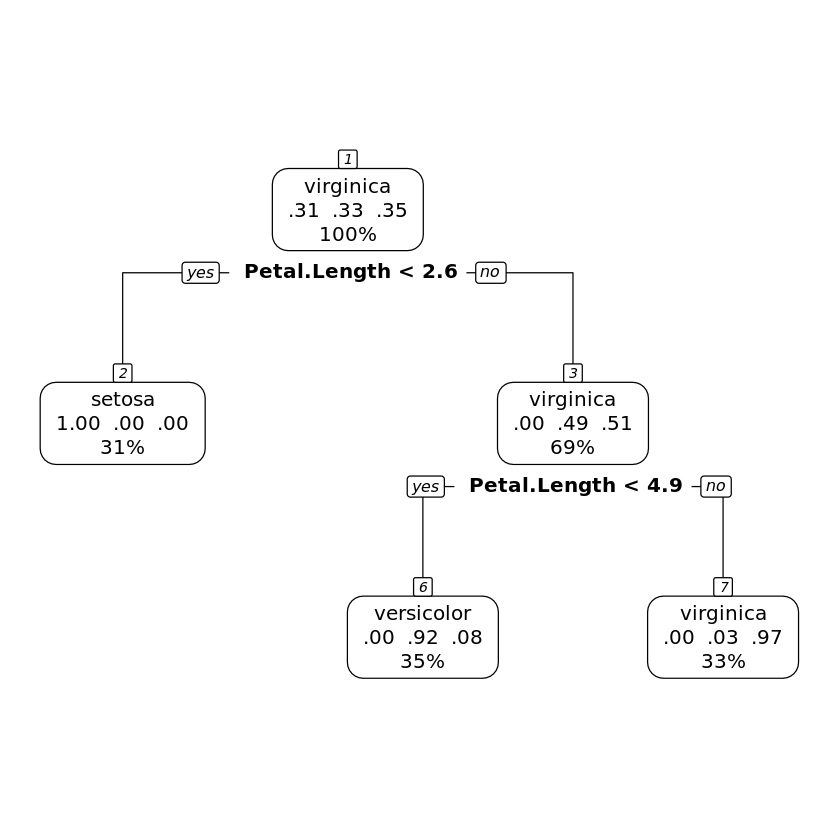

In [8]:
prp(iris.tree, type=2, extra="auto", nn=TRUE, branch=1, varlen=0, yesno=2)

In [9]:
pred_new = predict(iris.tree, testData, type="class")
accuracy = table(pred_new , testData$Species)
accuracy = sum(diag(accuracy))/sum(accuracy)
print(paste("accuracy s1:", accuracy))

[1] "accuracy s1: 0.933333333333333"


In [10]:
newCase = iris[c(1,10,100, 140),]
newCase$Species= NULL
print(newCase)

    Sepal.Length Sepal.Width Petal.Length Petal.Width
1            5.1         3.5          1.4         0.2
10           4.9         3.1          1.5         0.1
100          5.7         2.8          4.1         1.3
140          6.9         3.1          5.4         2.1


In [11]:
print("new predict")

[1] "new predict"


In [12]:
pred_new = predict(iris.tree, newCase, type="class")
print(pred_new)

         1         10        100        140 
    setosa     setosa versicolor  virginica 
Levels: setosa versicolor virginica


## regression

In [13]:
tree.gre = rpart(Petal.Length ~ Petal.Width, data= trainingData)
tree.gre

n= 105 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 105 319.5585000 3.829524  
   2) Petal.Width< 0.8 33   0.9024242 1.451515 *
   3) Petal.Width>=0.8 72  46.5127800 4.919444  
     6) Petal.Width< 1.75 39  10.0466700 4.366667  
      12) Petal.Width< 1.35 19   1.8094740 4.005263 *
      13) Petal.Width>=1.35 20   3.3980000 4.710000 *
     7) Petal.Width>=1.75 33  10.4654500 5.572727 *

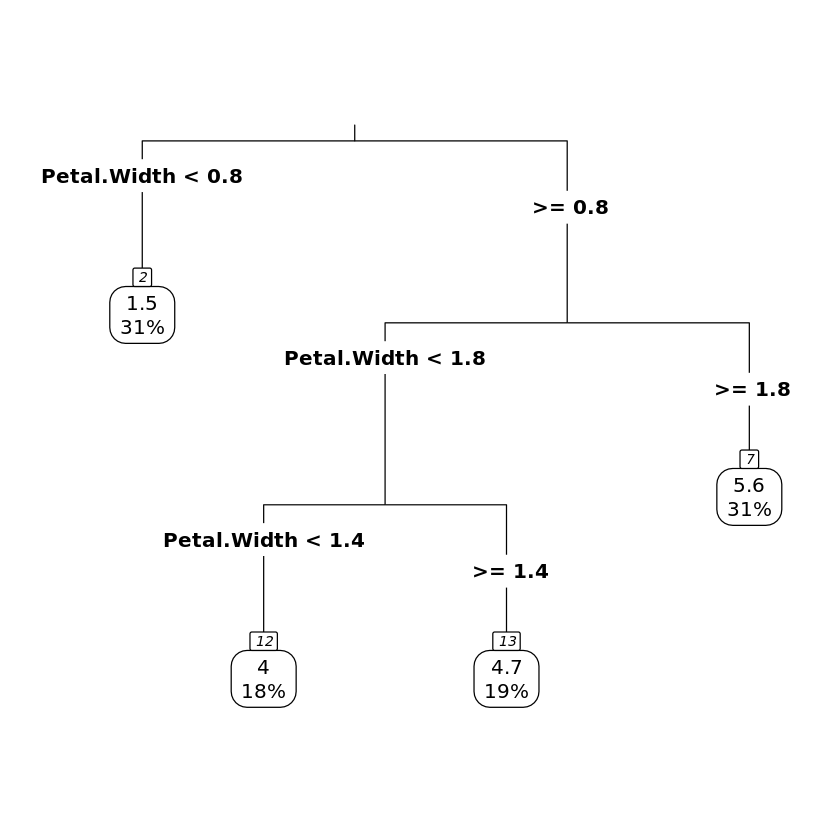

In [14]:
prp(tree.gre, type=3, extra="auto", nn=TRUE, branch=1, varlen=0, yesno=2)

In [18]:
newdf = data.frame(testData['Petal.Width'])
predictions = predict(tree.gre,newdf)
mse = mean((testData$Petal.Length - predictions)^2)
print(mse)

[1] 0.160362


In [19]:
now = data.frame(Petal.Width = c(0.25,1.25, 2.25))
predict_new = predict(tree.gre, now)
predict_new

1        2        3 
1.451515 4.005263 5.572727